In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset-exploratory-data-analysis-eda/__results__.html
/kaggle/input/titanic-dataset-exploratory-data-analysis-eda/__notebook__.ipynb
/kaggle/input/titanic-dataset-exploratory-data-analysis-eda/__output__.json
/kaggle/input/titanic-dataset-exploratory-data-analysis-eda/custom.css
/kaggle/input/titanic-dataset-exploratory-data-analysis-eda/__results___files/__results___15_0.png
/kaggle/input/titanic-dataset-exploratory-data-analysis-eda/__results___files/__results___12_8.png
/kaggle/input/titanic-dataset-exploratory-data-analysis-eda/__results___files/__results___19_0.png
/kaggle/input/titanic-dataset-exploratory-data-analysis-eda/__results___files/__results___10_3.png
/kaggle/input/titanic-dataset-exploratory-data-analysis-eda/__results___files/__results___12_3.png
/kaggle/input/titanic-dataset-exploratory-data-analysis-eda/__results___files/__results___15_2.png
/kaggle/input/titanic-dataset-exploratory-data-analysis-eda/__results___files/__results___12_1.png
/kag

## Load Libraries & Dataset

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

sns.set(style='whitegrid')
titanic_data = sns.load_dataset('titanic')


# Dataset Overview

In [3]:
print("Shape:", titanic_data.shape)
print(titanic_data.dtypes)
titanic_data.head()


Shape: (891, 15)
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Missing Value Analysis
🔍 Check & Visualize Missing Data

In [4]:
# Percentage missing
(titanic_data.isnull().sum() / len(titanic_data)) * 100


survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

# Heatmap of Missing Values

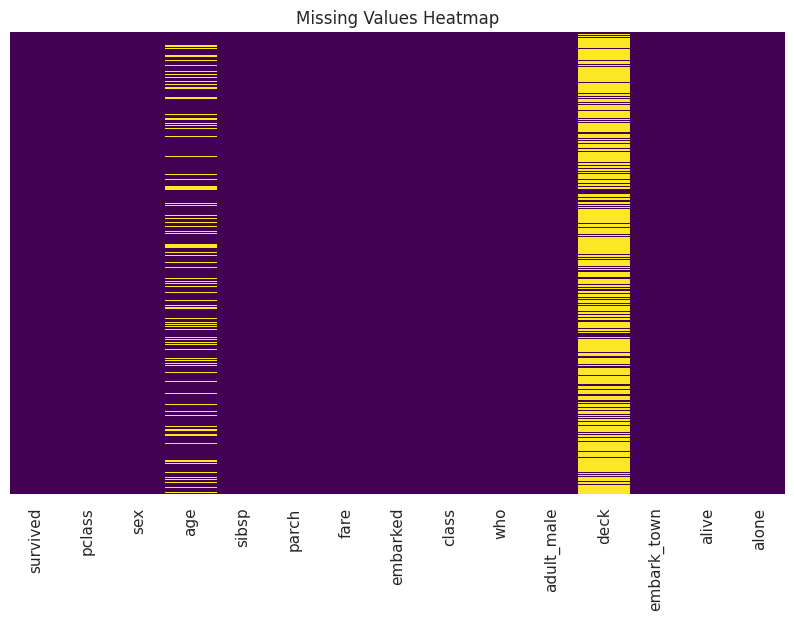

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_data.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()


# Imputation with Iterative Imputer (Random Forest)

In [6]:
titanic_filled = titanic_data.copy()

# Separate columns
num_cols = titanic_filled.select_dtypes(include=['number']).columns
cat_cols = titanic_filled.select_dtypes(exclude=['number']).columns

# Impute numeric
imp = IterativeImputer(estimator=RandomForestRegressor(), random_state=42)
titanic_filled[num_cols] = imp.fit_transform(titanic_filled[num_cols])

# Impute categorical
for col in cat_cols:
    titanic_filled[col] = titanic_filled[col].fillna(titanic_filled[col].mode()[0])


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


# Univariate Visualizations
🎂 Age Distribution - Histogram + KDE

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


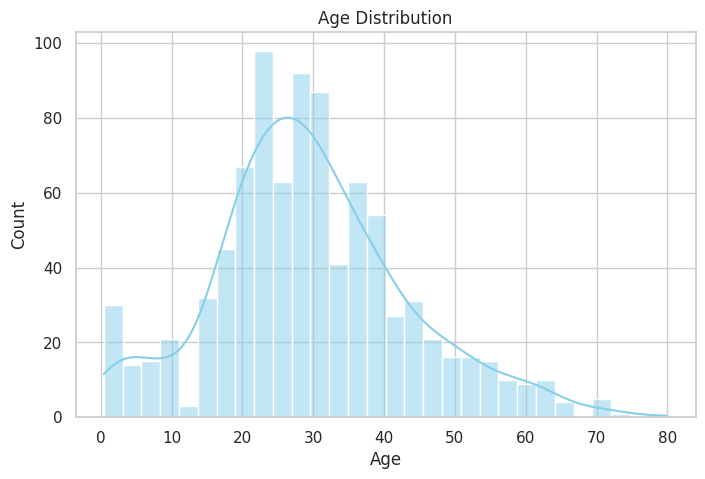

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(titanic_filled['age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()


# Fare Distribution - Histogram

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


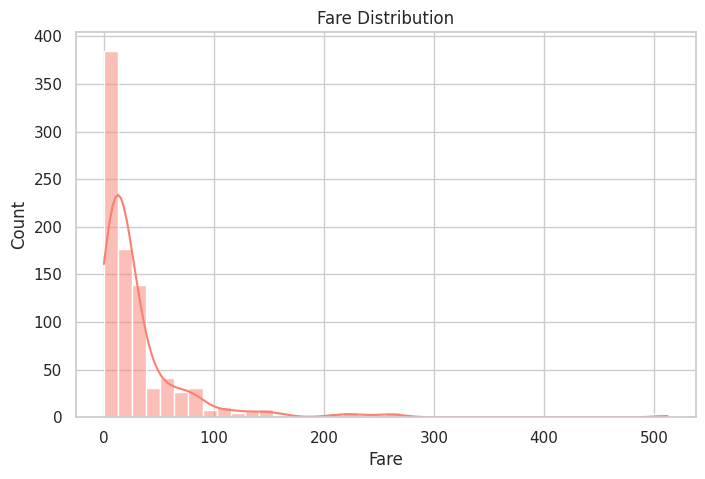

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(titanic_filled['fare'], kde=True, bins=40, color='salmon')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()


# Age Box Plot - Detect Outliers

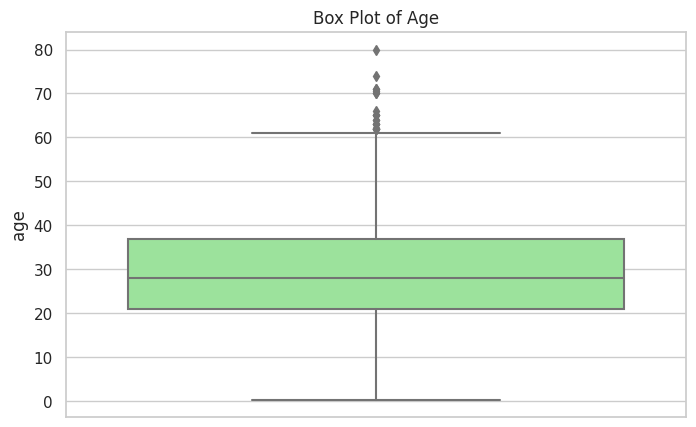

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(y='age', data=titanic_filled, color='lightgreen')
plt.title('Box Plot of Age')
plt.show()


# Fare Box Plot - Outlier Detection

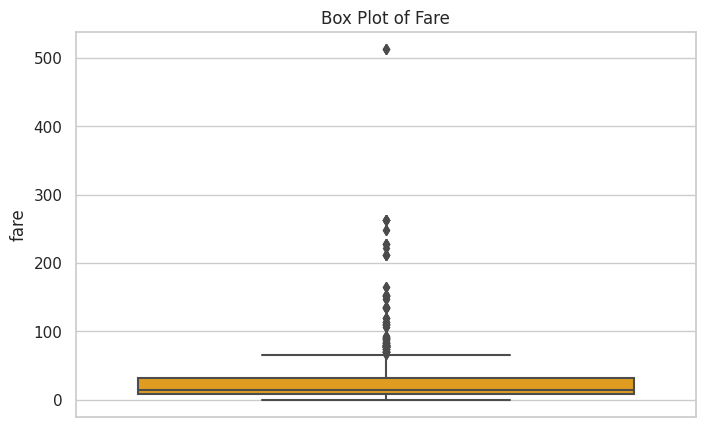

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(y='fare', data=titanic_filled, color='orange')
plt.title('Box Plot of Fare')
plt.show()


# Bivariate Visualizations
✅ Survival Count


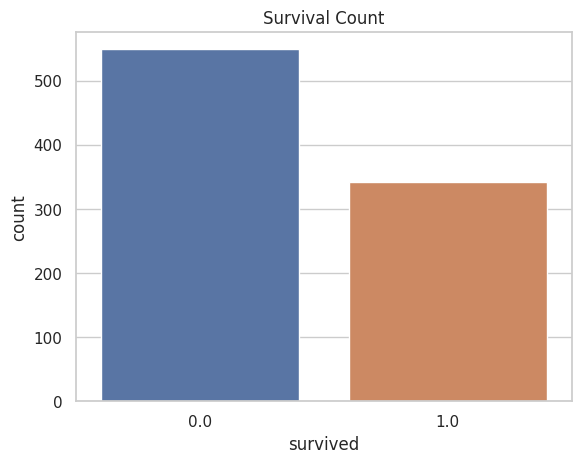

In [11]:
sns.countplot(x='survived', data=titanic_filled)
plt.title('Survival Count')
plt.show()


# Survival by Gender

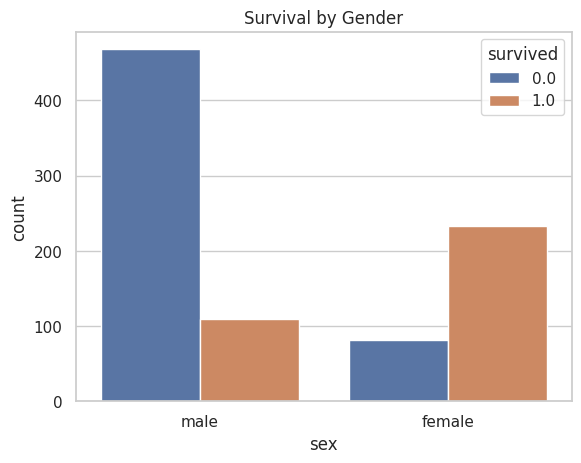

In [12]:
sns.countplot(x='sex', hue='survived', data=titanic_filled)
plt.title('Survival by Gender')
plt.show()


# Survival by Pclass

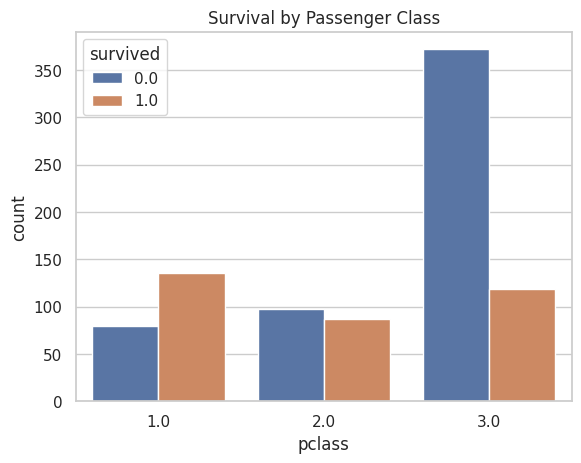

In [13]:
sns.countplot(x='pclass', hue='survived', data=titanic_filled)
plt.title('Survival by Passenger Class')
plt.show()


# Box Plot of Age by Survival

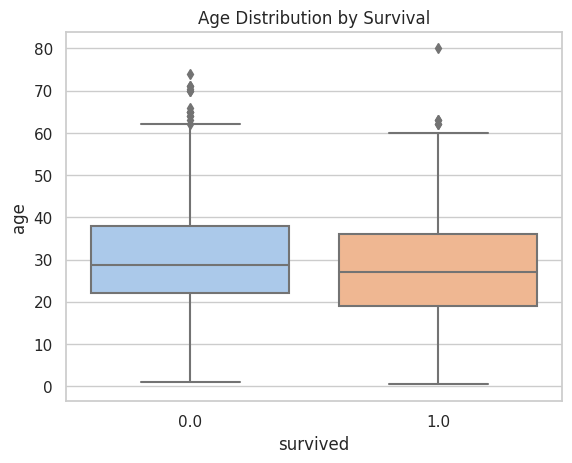

In [14]:
sns.boxplot(x='survived', y='age', data=titanic_filled, palette='pastel')
plt.title('Age Distribution by Survival')
plt.show()


# Box Plot of Fare by Class

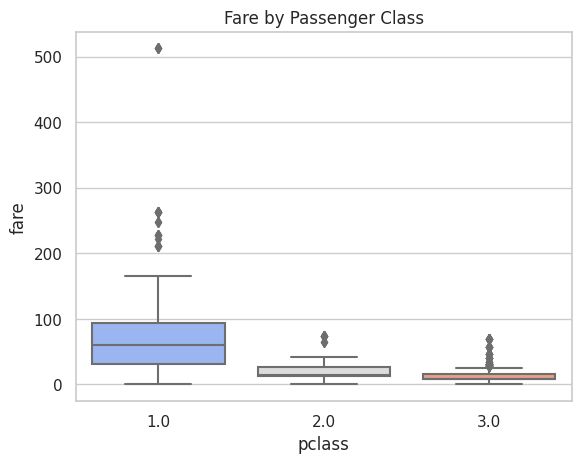

In [15]:
sns.boxplot(x='pclass', y='fare', data=titanic_filled, palette='coolwarm')
plt.title('Fare by Passenger Class')
plt.show()


# Box Plot of Fare by Class

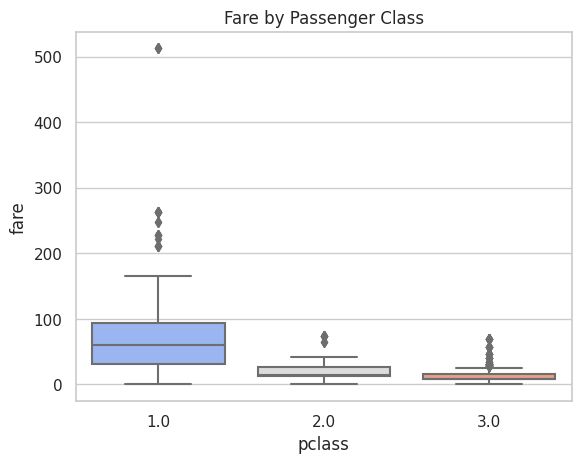

In [16]:
sns.boxplot(x='pclass', y='fare', data=titanic_filled, palette='coolwarm')
plt.title('Fare by Passenger Class')
plt.show()


# Multivariate Visualizations
🎯 Survival by Sex and Class

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


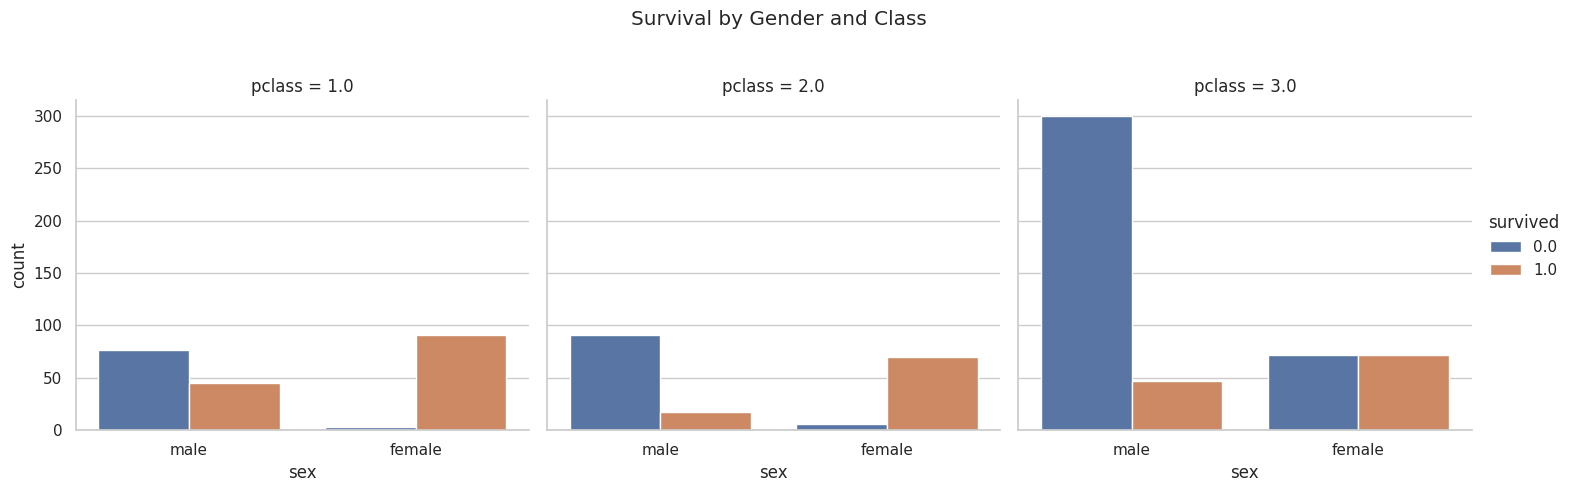

In [17]:
sns.catplot(x='sex', hue='survived', col='pclass', kind='count', data=titanic_filled)
plt.subplots_adjust(top=0.8)
plt.suptitle('Survival by Gender and Class')
plt.show()


# Survival by Embarked

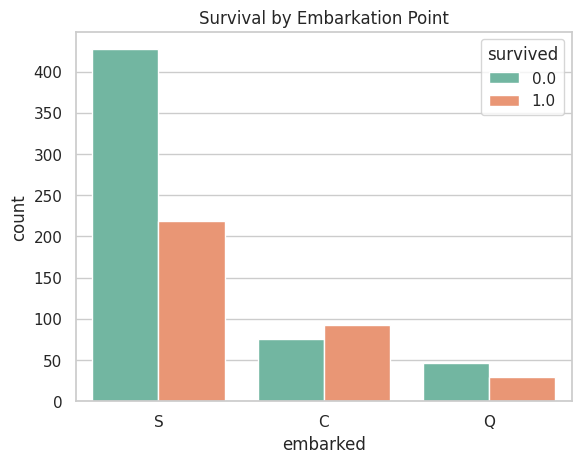

In [18]:
sns.countplot(x='embarked', hue='survived', data=titanic_filled, palette='Set2')
plt.title('Survival by Embarkation Point')
plt.show()


# Family Size vs Survival

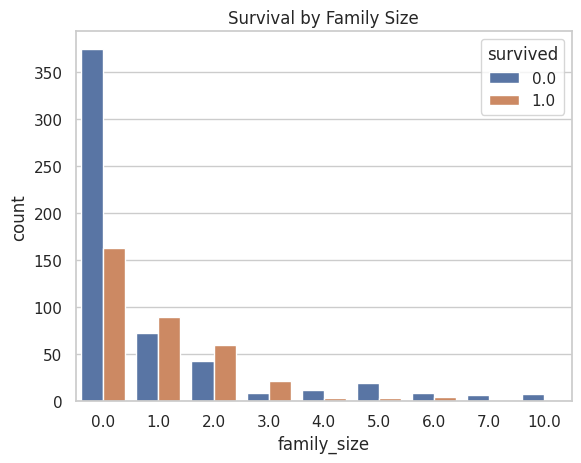

In [19]:
titanic_filled['family_size'] = titanic_filled['sibsp'] + titanic_filled['parch']
sns.countplot(x='family_size', hue='survived', data=titanic_filled)
plt.title('Survival by Family Size')
plt.show()


# Correlation Heatmap (Numerical Features)

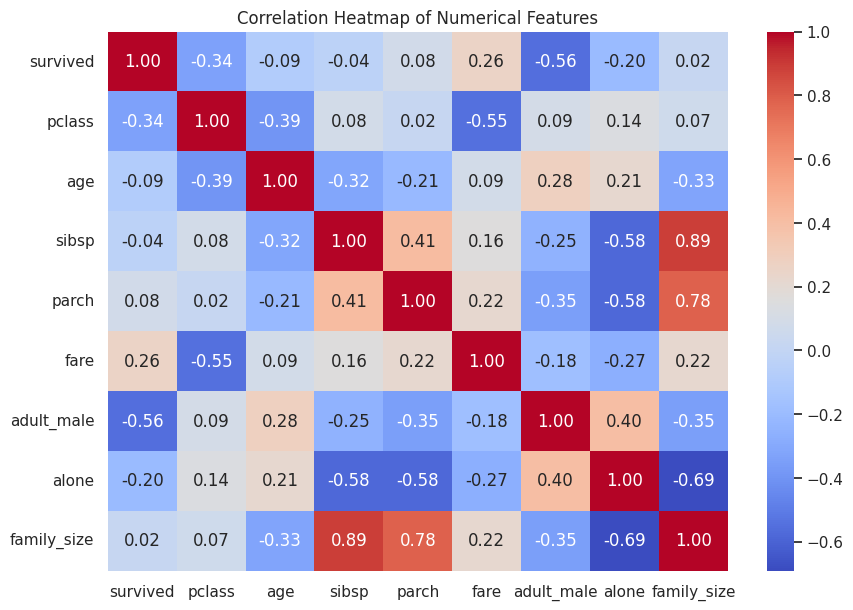

In [20]:
plt.figure(figsize=(10, 7))
sns.heatmap(titanic_filled.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
